Galaxy NGC4501: inclination = 56.0°, b/a = 0.583
Plotted 419190 pixels for NGC4501
log(SFR) range: -3.83 to 0.27


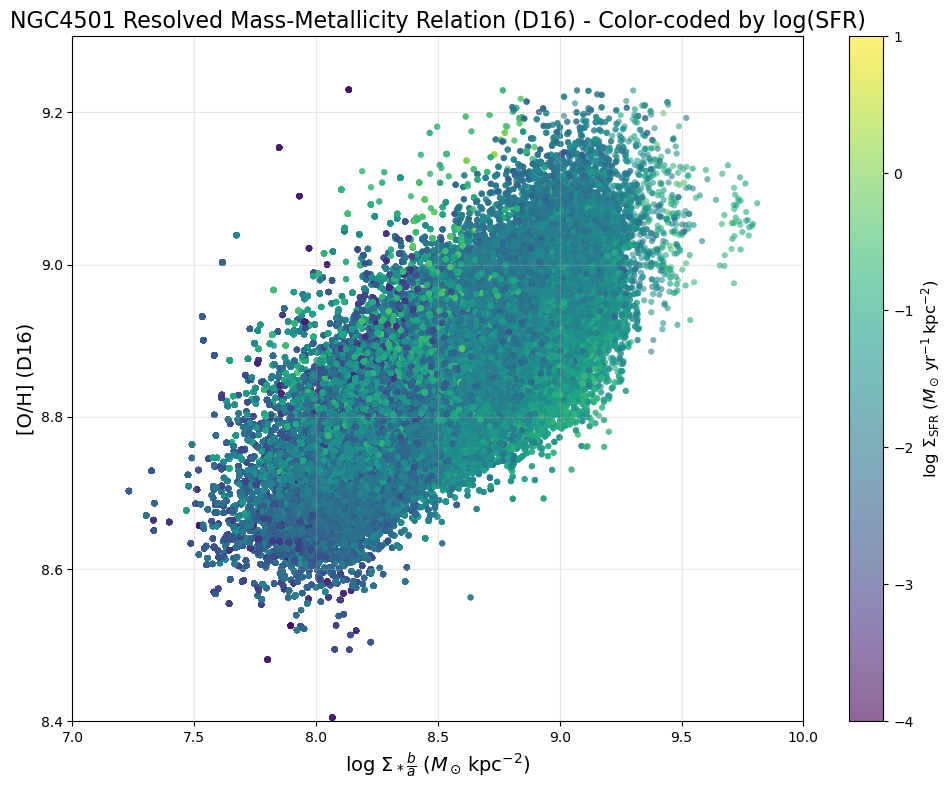

Successfully plotted spatially-resolved MZR for NGC4501 with log(SFR) color-coding


In [1]:
# ------------------------------------------------------------------
# NGC4501 Resolved MZR (D16) - Color-coded by log(SFR)
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits

def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and D16 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_d16 = h['O_H_D16_SF'].data
    return sigM, sigSFR_SF, oh_d16

def read_galaxy_inclination(galaxy_name):
    """Read galaxy inclination from appropriate file"""
    # This function should be defined based on your inclination data source
    # For now, using NGC4501 inclination as example
    inclinations = {
        'NGC4501': 56.0  # degrees - update with actual value
    }
    return inclinations.get(galaxy_name, None)

# Create single plot figure
fig, ax = plt.subplots(figsize=(10, 8))

# Focus on NGC4501 only
gal = 'NGC4501'
bin_file = Path(f'{gal}_SPATIAL_BINNING_maps_extended.fits')
gas_file = Path(f'{gal}_gas_BIN_maps_extended.fits')

if bin_file.exists() and gas_file.exists():
    # Load maps using the provided function
    logSigmaM, logSigmaSFR, oh_d16 = load_maps(gal)
    
    # Get galaxy inclination and apply correction
    galaxy_inclination = read_galaxy_inclination(gal)
    if galaxy_inclination is None:
        print(f"Warning: No inclination data for {gal}, using uncorrected values")
        inclination_correction = 0.0  # no correction in log space
    else:
        inclination_rad = np.deg2rad(galaxy_inclination)
        cos_inclination = np.cos(inclination_rad)
        # Calculate b/a factor: sqrt((1-q0^2)*cos^2(i) + q0^2) where q0=0.2
        ba_factor = np.abs(np.sqrt((1-0.2**2)*cos_inclination**2 + 0.2**2))
        inclination_correction = np.log10(ba_factor)
        print(f"Galaxy {gal}: inclination = {galaxy_inclination}°, b/a = {ba_factor:.3f}")

    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_d16) & np.isfinite(logSigmaSFR)

    # Apply inclination correction to stellar mass surface density
    logSigmaM_corr = logSigmaM[good] + inclination_correction

    # Create scatter plot color-coded by log(SFR)
    scatter = ax.scatter(
        logSigmaM_corr,
        oh_d16[good],
        c=logSigmaSFR[good],
        s=20, 
        alpha=0.6,
        cmap='viridis',
        vmin=-4,
        vmax=1,
        edgecolors='none'
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$', 
                   fontsize=12)
    
    print(f"Plotted {np.sum(good)} pixels for {gal}")
    print(f"log(SFR) range: {logSigmaSFR[good].min():.2f} to {logSigmaSFR[good].max():.2f}")
    
else:
    print(f"Data files not found for {gal}")

# Final cosmetics
ax.set_xlabel(r'$\log\,\Sigma_* \frac{b}{a} \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
ax.set_ylabel(r'[O/H] (D16)', fontsize=14)
ax.set_title(f'{gal} Resolved Mass-Metallicity Relation (D16) - Color-coded by log(SFR)', fontsize=16)
ax.set_xlim(7, 10)
ax.set_ylim(8.4, 9.3)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Successfully plotted spatially-resolved MZR for {gal} with log(SFR) color-coding")

Plotted 419179 pixels for NGC4501
log(SFR) range: -3.83 to 0.27


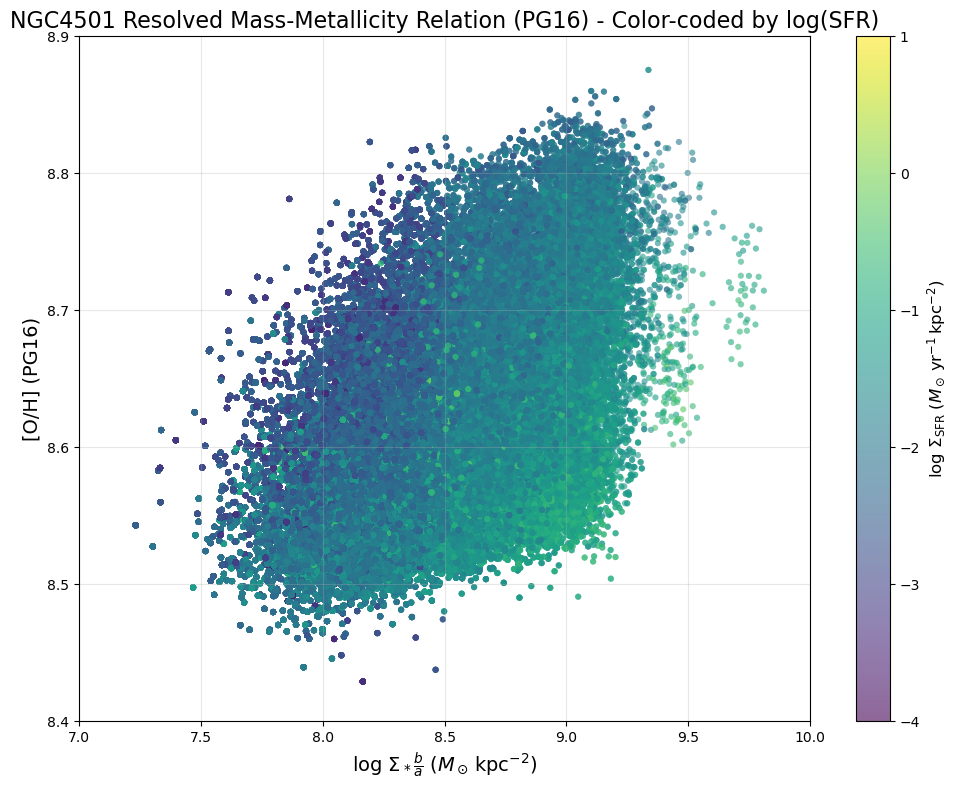

Successfully plotted spatially-resolved MZR for NGC4501 with PG16 metallicity and log(SFR) color-coding


In [2]:
# Update from D16 to PG16 metallicity
def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and PG16 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_pg16 = h['O_H_PG16_SF'].data  # Changed from D16 to PG16
    return sigM, sigSFR_SF, oh_pg16

# Create new plot figure
fig, ax = plt.subplots(figsize=(10, 8))

if bin_file.exists() and gas_file.exists():
    # Load maps with PG16 metallicity
    logSigmaM, logSigmaSFR, oh_pg16 = load_maps(gal)
    
    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_pg16) & np.isfinite(logSigmaSFR)

    # Apply inclination correction to stellar mass surface density
    logSigmaM_corr = logSigmaM[good] + inclination_correction

    # Create scatter plot color-coded by log(SFR)
    scatter = ax.scatter(
        logSigmaM_corr,
        oh_pg16[good],
        c=logSigmaSFR[good],
        s=20, 
        alpha=0.6,
        cmap='viridis',
        vmin=-4,
        vmax=1,
        edgecolors='none'
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$', 
                   fontsize=12)
    
    print(f"Plotted {np.sum(good)} pixels for {gal}")
    print(f"log(SFR) range: {logSigmaSFR[good].min():.2f} to {logSigmaSFR[good].max():.2f}")
    
else:
    print(f"Data files not found for {gal}")

# Final cosmetics
ax.set_xlabel(r'$\log\,\Sigma_* \frac{b}{a} \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
ax.set_ylabel(r'[O/H] (PG16)', fontsize=14)  # Updated label
ax.set_title(f'{gal} Resolved Mass-Metallicity Relation (PG16) - Color-coded by log(SFR)', fontsize=16)  # Updated title
ax.set_xlim(7, 10)
ax.set_ylim(8.4, 8.9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Successfully plotted spatially-resolved MZR for {gal} with PG16 metallicity and log(SFR) color-coding")


Plotted 419360 pixels for NGC4501
log(SFR) range: -3.83 to 0.27


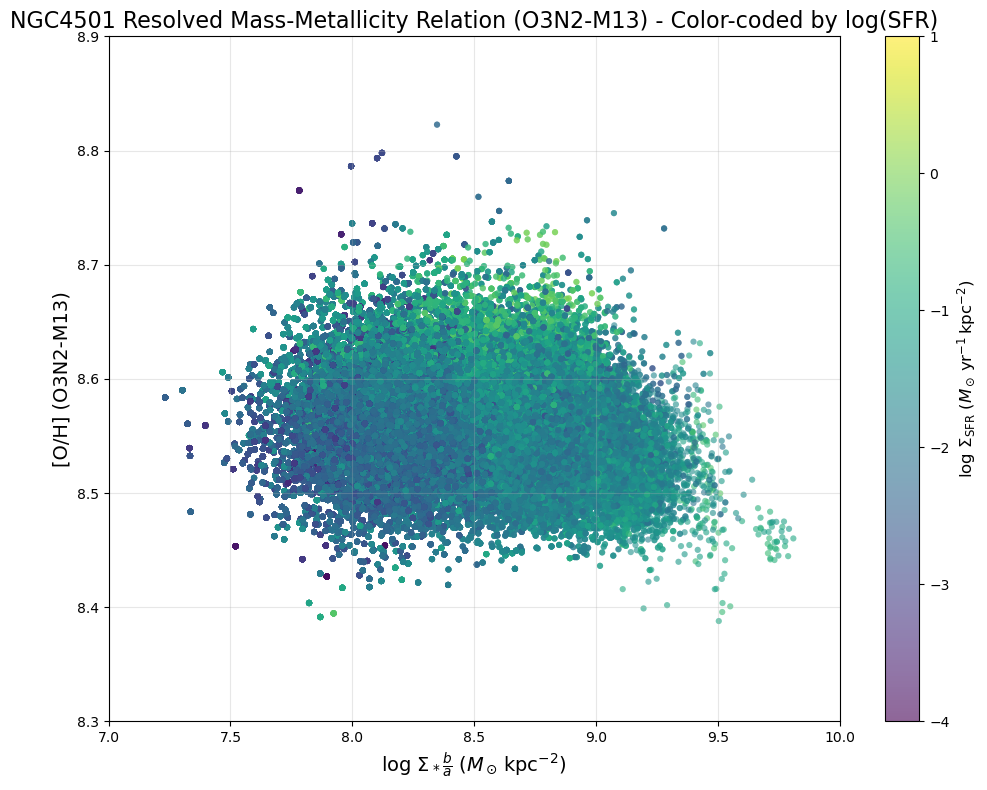

Successfully plotted spatially-resolved MZR for NGC4501 with O3N2-M13 metallicity and log(SFR) color-coding


In [3]:
# Update from PG16 to O3N2-M13 metallicity
def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and O3N2-M13 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_o3n2_m13 = h['O_H_O3N2_M13_SF'].data  # Changed from PG16 to O3N2-M13
    return sigM, sigSFR_SF, oh_o3n2_m13

# Create new plot figure
fig, ax = plt.subplots(figsize=(10, 8))

if bin_file.exists() and gas_file.exists():
    # Load maps with O3N2-M13 metallicity
    logSigmaM, logSigmaSFR, oh_o3n2_m13 = load_maps(gal)
    
    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_o3n2_m13) & np.isfinite(logSigmaSFR)

    # Apply inclination correction to stellar mass surface density
    logSigmaM_corr = logSigmaM[good] + inclination_correction

    # Create scatter plot color-coded by log(SFR)
    scatter = ax.scatter(
        logSigmaM_corr,
        oh_o3n2_m13[good],
        c=logSigmaSFR[good],
        s=20, 
        alpha=0.6,
        cmap='viridis',
        vmin=-4,
        vmax=1,
        edgecolors='none'
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$', 
                   fontsize=12)
    
    print(f"Plotted {np.sum(good)} pixels for {gal}")
    print(f"log(SFR) range: {logSigmaSFR[good].min():.2f} to {logSigmaSFR[good].max():.2f}")
    
else:
    print(f"Data files not found for {gal}")

# Final cosmetics
ax.set_xlabel(r'$\log\,\Sigma_* \frac{b}{a} \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
ax.set_ylabel(r'[O/H] (O3N2-M13)', fontsize=14)  # Updated label
ax.set_title(f'{gal} Resolved Mass-Metallicity Relation (O3N2-M13) - Color-coded by log(SFR)', fontsize=16)  # Updated title
ax.set_xlim(7, 10)
ax.set_ylim(8.3, 8.9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Successfully plotted spatially-resolved MZR for {gal} with O3N2-M13 metallicity and log(SFR) color-coding")


Plotted 419360 pixels for NGC4501
log(SFR) range: -3.83 to 0.27


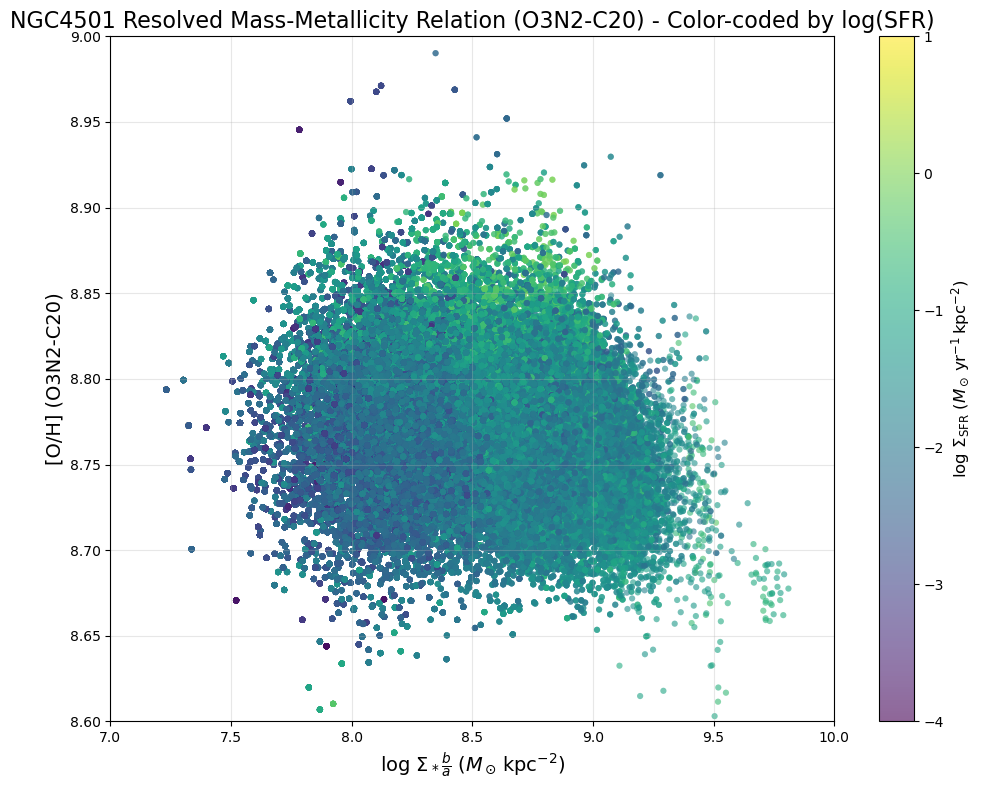

Successfully plotted spatially-resolved MZR for NGC4501 with O3N2-C20 metallicity and log(SFR) color-coding


In [4]:
# Update from O3N2-M13 to O3N2-C20 metallicity
def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and O3N2-C20 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_o3n2_c20 = h['O_H_O3N2_C20_SF'].data  # Changed from O3N2-M13 to O3N2-C20
    return sigM, sigSFR_SF, oh_o3n2_c20

# Create new plot figure
fig, ax = plt.subplots(figsize=(10, 8))

if bin_file.exists() and gas_file.exists():
    # Load maps with O3N2-C20 metallicity
    logSigmaM, logSigmaSFR, oh_o3n2_c20 = load_maps(gal)
    
    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_o3n2_c20) & np.isfinite(logSigmaSFR)

    # Apply inclination correction to stellar mass surface density
    logSigmaM_corr = logSigmaM[good] + inclination_correction

    # Create scatter plot color-coded by log(SFR)
    scatter = ax.scatter(
        logSigmaM_corr,
        oh_o3n2_c20[good],
        c=logSigmaSFR[good],
        s=20, 
        alpha=0.6,
        cmap='viridis',
        vmin=-4,
        vmax=1,
        edgecolors='none'
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$', 
                   fontsize=12)
    
    print(f"Plotted {np.sum(good)} pixels for {gal}")
    print(f"log(SFR) range: {logSigmaSFR[good].min():.2f} to {logSigmaSFR[good].max():.2f}")
    
else:
    print(f"Data files not found for {gal}")

# Final cosmetics
ax.set_xlabel(r'$\log\,\Sigma_* \frac{b}{a} \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
ax.set_ylabel(r'[O/H] (O3N2-C20)', fontsize=14)  # Updated label
ax.set_title(f'{gal} Resolved Mass-Metallicity Relation (O3N2-C20) - Color-coded by log(SFR)', fontsize=16)  # Updated title
ax.set_xlim(7, 10)
ax.set_ylim(8.6, 9.0)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Successfully plotted spatially-resolved MZR for {gal} with O3N2-C20 metallicity and log(SFR) color-coding")


D16: Plotted 419190 pixels
PG16: Plotted 419179 pixels
O3N2-M13: Plotted 419360 pixels
O3N2-C20: Plotted 419360 pixels


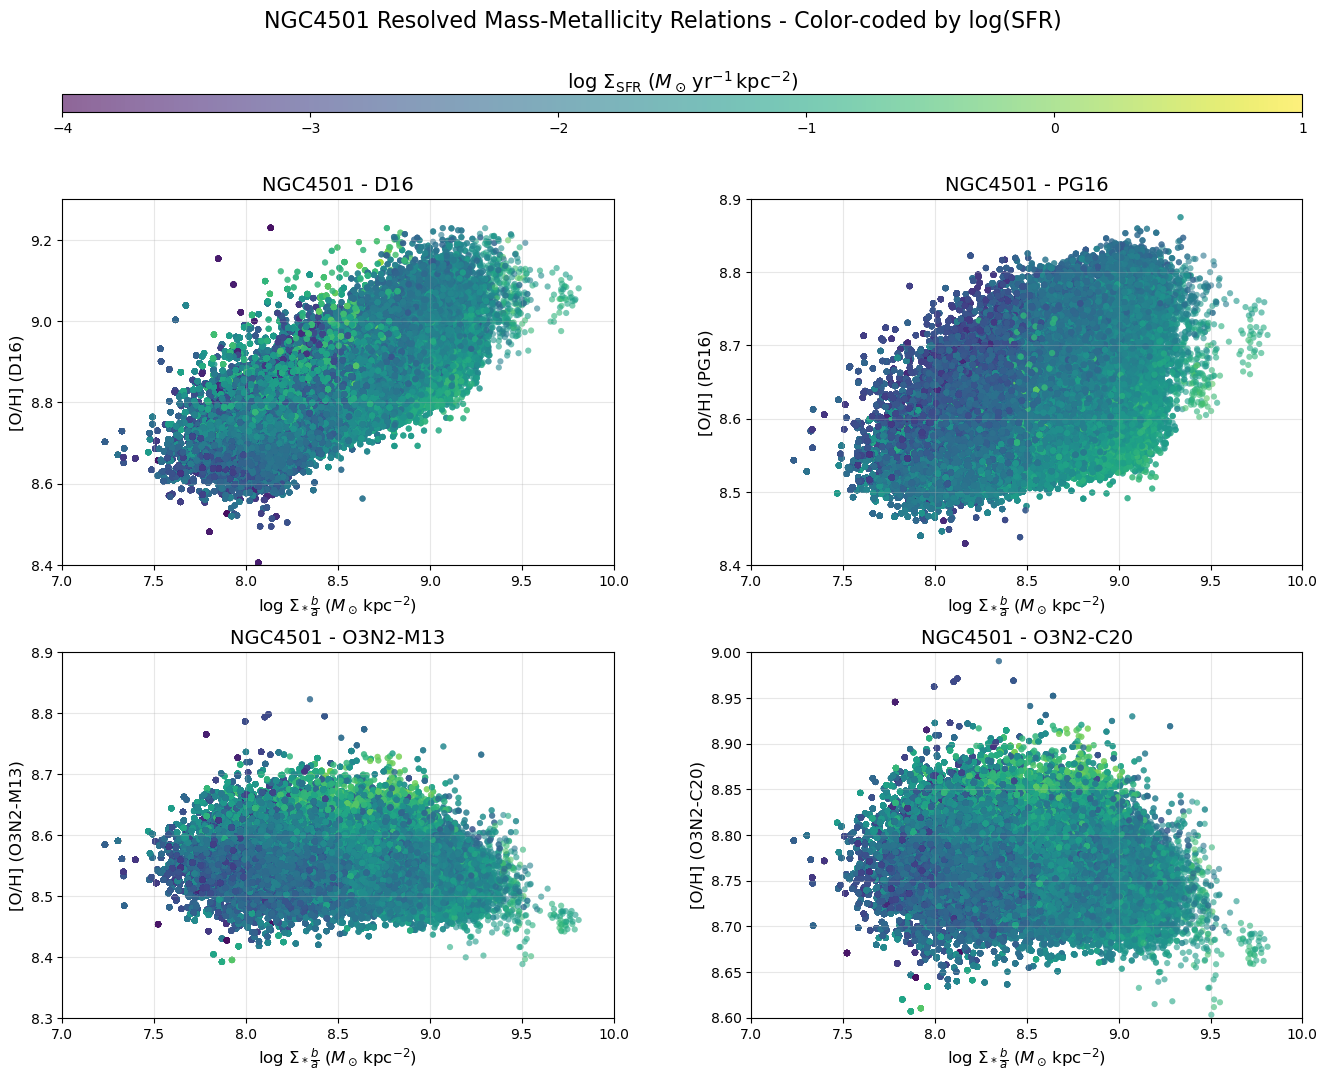


Successfully created combined plot with 4 metallicity calibrations for NGC4501
Galaxy NGC4501: inclination = 56.0°, b/a = 0.791


In [5]:
# Combined plot with 4 metallicity calibrations
# 2x2 subplots with shared horizontal colorbar at top

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from astropy.io import fits

def load_maps_all_calibrations(gal):
    """Load all metallicity calibrations for a galaxy"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_d16 = h['O_H_D16_SF'].data
        oh_pg16 = h['O_H_PG16_SF'].data
        oh_o3n2_m13 = h['O_H_O3N2_M13_SF'].data
        oh_o3n2_c20 = h['O_H_O3N2_C20_SF'].data
    return sigM, sigSFR_SF, oh_d16, oh_pg16, oh_o3n2_m13, oh_o3n2_c20

def read_galaxy_inclination(galaxy_name):
    """Read galaxy inclination from appropriate file"""
    inclinations = {
        'NGC4501': 56.0  # degrees - update with actual value
    }
    return inclinations.get(galaxy_name, None)

# Setup
gal = 'NGC4501'
bin_file = Path(f'{gal}_SPATIAL_BINNING_maps_extended.fits')
gas_file = Path(f'{gal}_gas_BIN_maps_extended.fits')

# Calculate inclination correction
galaxy_inclination = read_galaxy_inclination(gal)
if galaxy_inclination is None:
    inclination_correction = 0.0
else:
    inclination_rad = np.deg2rad(galaxy_inclination)
    cos_inclination = np.cos(inclination_rad)
    ba_factor = np.abs(np.sqrt((1-0.2**2)*cos_inclination**2 + 0.2**2))
    inclination_correction = np.log10(ba_factor)

if bin_file.exists() and gas_file.exists():
    # Load all data
    logSigmaM, logSigmaSFR, oh_d16, oh_pg16, oh_o3n2_m13, oh_o3n2_c20 = load_maps_all_calibrations(gal)
    
    # Create figure with 2x2 subplots and space for colorbar
    fig = plt.figure(figsize=(16, 12))
    
    # Create a grid layout: colorbar at top, then 2x2 subplots
    gs = fig.add_gridspec(3, 2, height_ratios=[0.05, 1, 1], hspace=0.35, wspace=0.25)
    
    # Colorbar axis (spans full width at top)
    cbar_ax = fig.add_subplot(gs[0, :])
    
    # Subplot axes
    ax1 = fig.add_subplot(gs[1, 0])  # Top left - D16
    ax2 = fig.add_subplot(gs[1, 1])  # Top right - PG16
    ax3 = fig.add_subplot(gs[2, 0])  # Bottom left - O3N2-M13
    ax4 = fig.add_subplot(gs[2, 1])  # Bottom right - O3N2-C20
    
    # Data for each calibration
    calibrations = [
        (oh_d16, 'D16', (8.4, 9.3), ax1),
        (oh_pg16, 'PG16', (8.4, 8.9), ax2),
        (oh_o3n2_m13, 'O3N2-M13', (8.3, 8.9), ax3),
        (oh_o3n2_c20, 'O3N2-C20', (8.6, 9.0), ax4)
    ]
    
    # Create scatter plots for each calibration
    scatters = []
    for oh_data, calib_name, ylim, ax in calibrations:
        # Mask bad pixels
        good = np.isfinite(logSigmaM) & np.isfinite(oh_data) & np.isfinite(logSigmaSFR)
        
        # Apply inclination correction
        logSigmaM_corr = logSigmaM[good] + inclination_correction
        
        # Create scatter plot
        scatter = ax.scatter(
            logSigmaM_corr,
            oh_data[good],
            c=logSigmaSFR[good],
            s=20,
            alpha=0.6,
            cmap='viridis',
            vmin=-4,
            vmax=1,
            edgecolors='none'
        )
        scatters.append(scatter)
        
        # Formatting
        ax.set_xlabel(r'$\log\,\Sigma_* \frac{b}{a} \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=12)
        ax.set_ylabel(f'[O/H] ({calib_name})', fontsize=12)
        ax.set_title(f'{gal} - {calib_name}', fontsize=14)
        ax.set_xlim(7, 10)
        ax.set_ylim(ylim)
        ax.grid(True, alpha=0.3)
        
        print(f"{calib_name}: Plotted {np.sum(good)} pixels")
    
    # Add shared colorbar at the top
    cbar = fig.colorbar(scatters[0], cax=cbar_ax, orientation='horizontal')
    cbar.set_label(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$', 
                   fontsize=14)
    cbar.ax.xaxis.set_label_position('top')
    
    # Add overall title
    fig.suptitle(f'{gal} Resolved Mass-Metallicity Relations - Color-coded by log(SFR)', 
                 fontsize=16, y=0.95)
    
    plt.show()
    
    print(f"\nSuccessfully created combined plot with 4 metallicity calibrations for {gal}")
    print(f"Galaxy {gal}: inclination = {galaxy_inclination}°, b/a = {np.exp(inclination_correction):.3f}")
    
else:
    print(f"Data files not found for {gal}")

D16: Plotted 419190 pixels in hexagonal bins
PG16: Plotted 419179 pixels in hexagonal bins
O3N2-M13: Plotted 419360 pixels in hexagonal bins
PG16: Plotted 419179 pixels in hexagonal bins
O3N2-M13: Plotted 419360 pixels in hexagonal bins
O3N2-C20: Plotted 419360 pixels in hexagonal bins
O3N2-C20: Plotted 419360 pixels in hexagonal bins


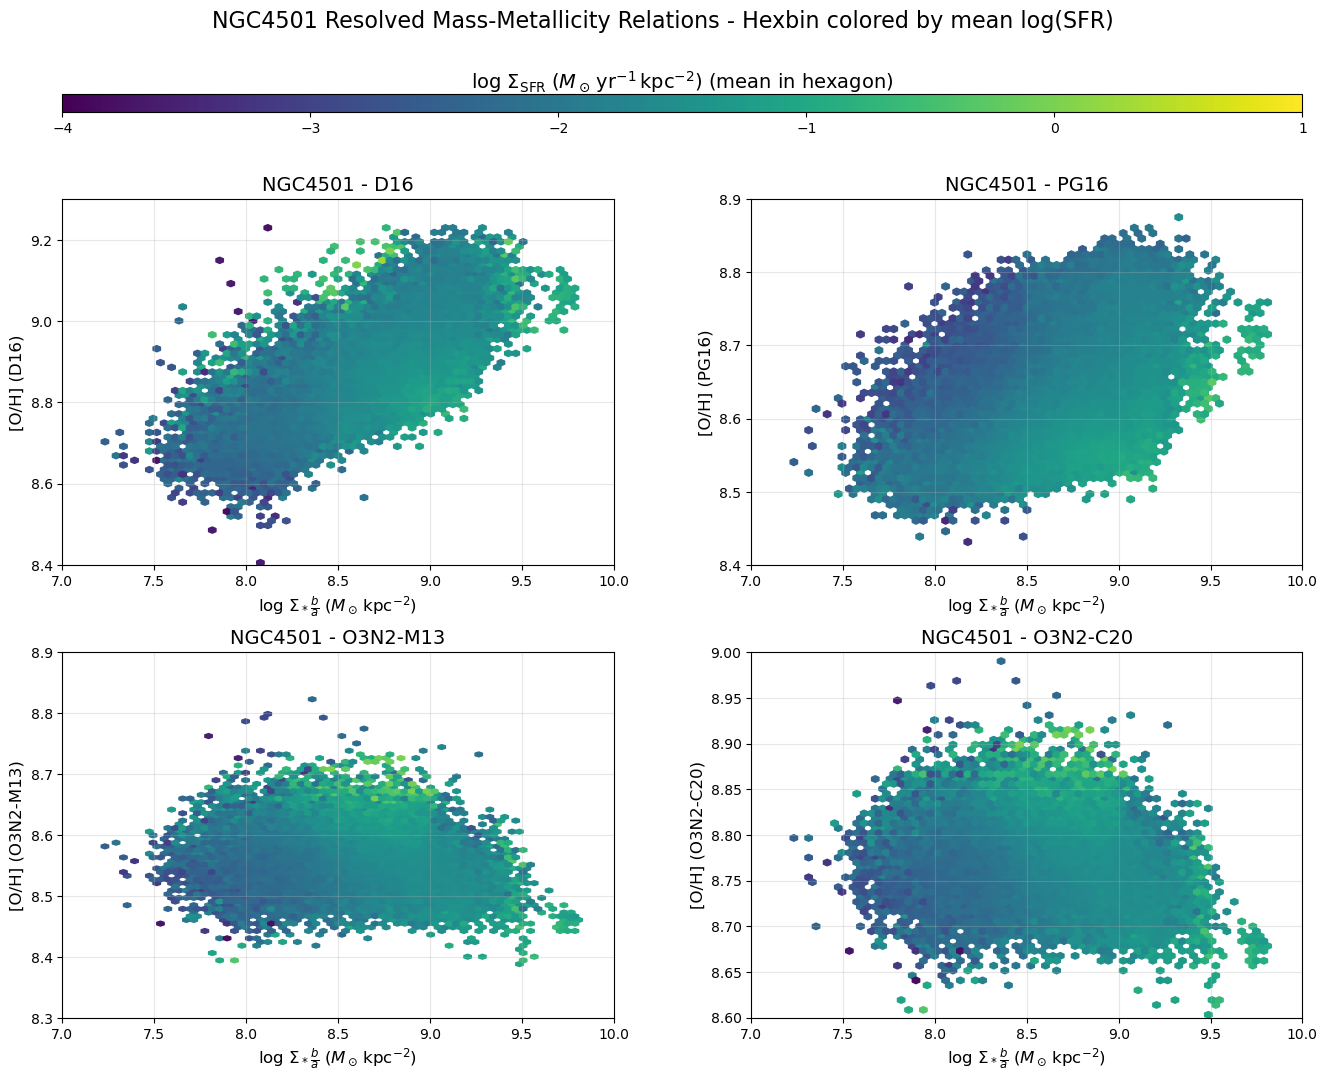


Successfully created combined hexbin plot with 4 metallicity calibrations for NGC4501
Galaxy NGC4501: inclination = 56.0°, b/a = 0.791


In [6]:
# Combined plot with 4 metallicity calibrations using hexagon plots
# 2x2 subplots with shared horizontal colorbar at top

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from astropy.io import fits

def load_maps_all_calibrations(gal):
    """Load all metallicity calibrations for a galaxy"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_d16 = h['O_H_D16_SF'].data
        oh_pg16 = h['O_H_PG16_SF'].data
        oh_o3n2_m13 = h['O_H_O3N2_M13_SF'].data
        oh_o3n2_c20 = h['O_H_O3N2_C20_SF'].data
    return sigM, sigSFR_SF, oh_d16, oh_pg16, oh_o3n2_m13, oh_o3n2_c20

def read_galaxy_inclination(galaxy_name):
    """Read galaxy inclination from appropriate file"""
    inclinations = {
        'NGC4501': 56.0  # degrees - update with actual value
    }
    return inclinations.get(galaxy_name, None)

# Setup
gal = 'NGC4501'
bin_file = Path(f'{gal}_SPATIAL_BINNING_maps_extended.fits')
gas_file = Path(f'{gal}_gas_BIN_maps_extended.fits')

# Calculate inclination correction
galaxy_inclination = read_galaxy_inclination(gal)
if galaxy_inclination is None:
    inclination_correction = 0.0
else:
    inclination_rad = np.deg2rad(galaxy_inclination)
    cos_inclination = np.cos(inclination_rad)
    ba_factor = np.abs(np.sqrt((1-0.2**2)*cos_inclination**2 + 0.2**2))
    inclination_correction = np.log10(ba_factor)

if bin_file.exists() and gas_file.exists():
    # Load all data
    logSigmaM, logSigmaSFR, oh_d16, oh_pg16, oh_o3n2_m13, oh_o3n2_c20 = load_maps_all_calibrations(gal)
    
    # Create figure with 2x2 subplots and space for colorbar
    fig = plt.figure(figsize=(16, 12))
    
    # Create a grid layout: colorbar at top, then 2x2 subplots
    gs = fig.add_gridspec(3, 2, height_ratios=[0.05, 1, 1], hspace=0.35, wspace=0.25)
    
    # Colorbar axis (spans full width at top)
    cbar_ax = fig.add_subplot(gs[0, :])
    
    # Subplot axes
    ax1 = fig.add_subplot(gs[1, 0])  # Top left - D16
    ax2 = fig.add_subplot(gs[1, 1])  # Top right - PG16
    ax3 = fig.add_subplot(gs[2, 0])  # Bottom left - O3N2-M13
    ax4 = fig.add_subplot(gs[2, 1])  # Bottom right - O3N2-C20
    
    # Data for each calibration
    calibrations = [
        (oh_d16, 'D16', (8.4, 9.3), ax1),
        (oh_pg16, 'PG16', (8.4, 8.9), ax2),
        (oh_o3n2_m13, 'O3N2-M13', (8.3, 8.9), ax3),
        (oh_o3n2_c20, 'O3N2-C20', (8.6, 9.0), ax4)
    ]
    
    # Create hexagon plots for each calibration
    hexbins = []
    for oh_data, calib_name, ylim, ax in calibrations:
        # Mask bad pixels
        good = np.isfinite(logSigmaM) & np.isfinite(oh_data) & np.isfinite(logSigmaSFR)
        
        # Apply inclination correction
        logSigmaM_corr = logSigmaM[good] + inclination_correction
        
        # Create hexbin plot with SFR as color (using reduce_C_function='mean' for average SFR in each hexagon)
        hexbin = ax.hexbin(
            logSigmaM_corr,
            oh_data[good],
            C=logSigmaSFR[good],
            gridsize=64,
            cmap='viridis',
            vmin=-4,
            vmax=1,
            reduce_C_function=np.mean,
            mincnt=1  # Only show hexagons with at least 1 data point
        )
        hexbins.append(hexbin)
        
        # Formatting
        ax.set_xlabel(r'$\log\,\Sigma_* \frac{b}{a} \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=12)
        ax.set_ylabel(f'[O/H] ({calib_name})', fontsize=12)
        ax.set_title(f'{gal} - {calib_name}', fontsize=14)
        ax.set_xlim(7, 10)
        ax.set_ylim(ylim)
        ax.grid(True, alpha=0.3)
        
        print(f"{calib_name}: Plotted {np.sum(good)} pixels in hexagonal bins")
    
    # Add shared colorbar at the top
    cbar = fig.colorbar(hexbins[0], cax=cbar_ax, orientation='horizontal')
    cbar.set_label(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$ (mean in hexagon)', 
                   fontsize=14)
    cbar.ax.xaxis.set_label_position('top')
    
    # Add overall title
    fig.suptitle(f'{gal} Resolved Mass-Metallicity Relations - Hexbin colored by mean log(SFR)', 
                 fontsize=16, y=0.95)
    
    plt.show()
    
    print(f"\nSuccessfully created combined hexbin plot with 4 metallicity calibrations for {gal}")
    print(f"Galaxy {gal}: inclination = {galaxy_inclination}°, b/a = {np.exp(inclination_correction):.3f}")
    
else:
    print(f"Data files not found for {gal}")